In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from Model import Model
from PlaceInputs import PlaceInputs
from utils import *
import configs

# Parameters and Initialization

In [2]:
# Parameters
N_inp = 5000
N_bar = 5000
num_states = 100

In [3]:
place_inputs = PlaceInputs(N_inp, num_states).get_inputs()
model = Model(
    N_inp, N_bar, num_states, wide_search_factor=2.,
    )

In [4]:
cache_states = [20, 30, 70]

# Example Narrow/Broad Recall

Now I just cached at location: 20


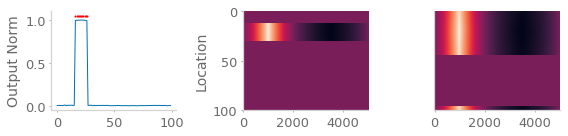

Now I just cached at location: 30


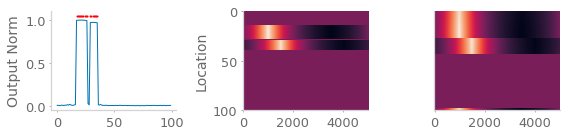

Now I just cached at location: 70


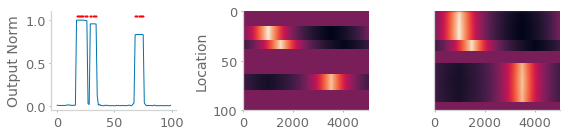

In [5]:
model.reset()

# Gaussian weights
#J_ix = 0.0002 + (0.00019995999999999952**2)*np.random.randn(model.N_bar, model.N_bar)
#J_ix = (1/np.sqrt(model.N_bar))*np.random.randn(model.N_bar, model.N_bar)

# Uniform weights
# model.J_ix = np.random.uniform(low=0.0, high=1.0, size=(model.N_bar, model.N_bar))
# model.J_ix /= np.linalg.norm(model.J_ix, axis=1)[None,:]
# model.J_ix *= 0.0002

# Random sparse weights
# J_ix = np.zeros((model.N_bar, model.N_bar))
# for i in range(model.N_bar):
#     size = 2
#     J_ix[np.random.choice(model.N_bar, size=size), i] = 1/size

#model.J_ix = J_ix

cache_identification = []
narrow_recall = []
wide_recall = []

for c_idx, cache_state in enumerate(cache_states):
    
    print("Now I just cached at location:", cache_state)
    preacts, acts, _, acts_over_time = model.run_recurrent(place_inputs, n_zero_input=20)
    model.update(place_inputs[cache_state], acts[cache_state], preacts[cache_state])

    _, _, _cache_identification, _ = model.run_recall(0.15, place_inputs)
    cache_identification.append(_cache_identification.copy())
    
    _, _, _narrow_recall, _ = model.run_narrow_recall(place_inputs)
    narrow_recall.append(_narrow_recall.copy())
    
    _, _, _wide_recall, _ = model.run_wide_recall(place_inputs)
    wide_recall.append(_wide_recall.copy())

    recall_plots(_cache_identification, _narrow_recall, _wide_recall, cache_states[:c_idx+1])